<div class="alert alert-block alert-info">
Singapore Management University<br>
CS105 Statistical Thinking for Data Science, 2022/23 Term 2
</div>

# CS105 Group Project Submission (Final)

-----
<img src="attachment:info.png" width="60" align="left"/>Provide your team details, including section, team number, team members, and the name of the dataset. 
Complete all of the following sections. For any part requiring code to derive your answers, please create a code cell immediately below your response and run the code.
To edit any markdown cell, double click the cell; after editing, execute the markdown cell to collapse it.

Include both Part I and Part II to produce a self-contained notebook. You may fine-tune Part I codes and/or findings based on feedback received on Part I submission.
<br>
-----

#### Section: G1
#### Team: 7
#### Members: 
1. Milton Sim 
2. Ryan Loh
3. Axel Tan
4. Tay Si Yu
5. Shawn Chia

#### Dataset: Climate

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
# parse climate.csv into a dataframe
df = pd.read_csv('climate.csv')

## Part I: Exploratory Data Analysis (EDA) [8% of final grade]

### 1. Overview of dataset [15% of Part I]

**a.** Summarise the background of the dataset [limited to 50 words]

**Response.** 

We believe this dataset aims to study the relationship between average global temperature and other factors. Analysing the dataset can provide insight on the impacts of certain climate factors, such as concentration of greenhouse gases and ozone layer depletion, on temperature changes, which could result in climate change.

**b.** State the size of the dataset

In [ ]:
# get number of rows and columns of dataframe using shape
n_rows, n_cols = df.shape
print(f"number of rows in climate dataset is {n_rows}")
print(f"number of columns in climate dataset is {n_cols}")

number of rows in climate dataset is 308
number of columns in climate dataset is 11


**c.** For each variable, describe what it represents and its data type (numerical or categorical)

| Name | Description | Data Type | Details
| :--- | :--- | :--- | :--- |
| Year | Year of observation | Categorical |
| Month | Month of observation | Categorical |
| MEI | Multivariate El Nino Southern Oscillation index (MEI) | Numerical |
| CO2 | Atmospheric concentration of carbon dioxide | Numerical |
| CH4 | Atmospheric concentration of methane | Numerical | Measured in parts per million by volume |
| N2O | Level of atmospheric concentration of nitrous oxide | Categorical | Possible values: “H”, “L” |
| CFC-11 | Atmospheric concentration of trichlorofluoromethane | Numerical | Measured in parts per billion by volume |
| CFC-12 | Atmospheric concentration of dichlorodifluoromethane | Numerical | Measured in parts per billion by volume |
| TSI | Level of Total Solar Irradiance | Categorical | Possible values: “H”, “M”, “L” |
| Aerosols | Level of stratospheric “aerosol optical depth” at 550nm | Categorical | Possible values: “H”, “M”, “L” |
| Temp | Difference in temperature between average global temperature and a reference value | Numerical |

Below is what we researched about the more in-depth details of the different variables of the dataset and how they could potentially relate to global temperatures. This subject matter data could guide us in deciding what to investigate and interpret from our data inferences.

<br>
<b> MEI </b> 
<br>
MEI is the measure of the changes in temperature of the Pacific Ocean caused by the interactions of two major climate phenomenon known as the El Nino and La Nina events on the water body. These events are generally caused by trade winds that affects how the water body moves. El Nino events generally lead to warmer temperatures while La Nina events generally lead to cooler temperatures and they generally follow a 3 to 7 years cycle. Therefore, MEI values have both positive and negative values to denote the warming and cooling effect that both events have on the temperature of the ocean body. As a result, the MEI values that measure the effects of El Nino and La Nina caused by winds could bring cooling and warming effects to the Pacific Ocean and could potentially increases global temperatures too.

<br>
<br>
<b> CO2, CH4, N2O </b>
<br> 
These gases are also known as greenhouse gases. Greenhouse gases could impact global temperatures as these gases traps heat that are radiating away from Earth to space. As a result, the heat cannot escape Earth and hence global temperatures could potentially increase.


<br>
<br>
<b> N2O, CFC-11, CFC-12 </b>
<br>
These gases are harmful to Earth's atmosphere, specifically the Ozone layer. The Ozone layer generally absorbs and reflects some of the sun's energy emitted on to Earth and protects the Earth from harmful UV rays. However, these harmful gases are able to react with the Ozone molecule in the Ozone layer and as a result create holes in the Ozone layer. With holes in the Ozone layer, the sun's energy and harmful UV rays can enter Earth. Hence, the levels of N2O, CFC-11, CFC-12 relates to the damage of the Ozone layer. As a result, increase in these gases could lead to higher global temperatures.

<br>
<br> 
<b> TSI </b>
<br>
TSI refers to the amount of solar radiation emitted by the sun. These values are changing due to the Earth's rotation around the Sun. As a result, increases in TSI value which relates to higher solar radiations could lead to higher global temperatures.

<br>
<br>
<b> Aerosols </b>
<br>
Aerosols refer to the volcanic materials that are released into the Earth's atmosphere during eruptions. These materials are generally very small but due to the large volumes emitted they can gather and cloud up in the Earth's atmosphere. These volcanic materials will hence block out the sun rays from hitting the Earth's surface. Some significant volcanic eruptions that led to increasingly high count of Aerosols include the Mount Pinatubo eruption in 1991 and the Iceland volcano Eyjafjallajokull eruption in 2010. As a result, lower Aerosol amounts could lead to higher global temperatures.

In [ ]:
# print data type of each column in df
print(df.dtypes)

Year          int64
Month         int64
MEI         float64
CO2         float64
CH4         float64
N2O          object
CFC-11      float64
CFC-12      float64
TSI          object
Aerosols     object
Temp        float64
dtype: object


### 2. Data pre-processing [35% of Part I]

**a.** For each variable, determine the percentage of missing data. For any column with missing data, describe how you resolve the issue. Clearly state any assumption you made.

<a id="non-na-count"></a>

In [ ]:
# count no. of non-null values in each column in dataframe
df.count()

Year        308
Month       308
MEI         308
CO2         288
CH4         308
N2O         308
CFC-11      308
CFC-12      308
TSI         289
Aerosols    308
Temp        308
dtype: int64

In [ ]:
# calculate percentage of missing values in each column in dataframe
100 * (1 - df.count() / n_rows)

Year        0.000000
Month       0.000000
MEI         0.000000
CO2         6.493506
CH4         0.000000
N2O         0.000000
CFC-11      0.000000
CFC-12      0.000000
TSI         6.168831
Aerosols    0.000000
Temp        0.000000
dtype: float64

<i><b> Assumptions and Justifications for the choices we made </b></i>
<br>
<u>*CO2*</u> : We chose to drop the values with NaN CO2 values as
<br>    1. Inputing NaN data with mean or mode may introduce bias into the dataset when CO2 values is affected by many different factors which is not independent of the previous years
<br>    2. Dropping the CO2 column is not feasible as only 6.5% of the data is missing, and the column has important information of CO2 values per year, a greenhouse gas, which could allow us to investigate the effects of greenhouse gases on global temperatures.
<br> >> Hence, we chose to drop the rows with NaN values in order to avoid introducing bias into our data and so that we could consider investigating the effect of one of the greenhouse gases on global temperatures.
<br><br>
<u>*TSI*</u> : We chose to drop the values with NaN TSI values as 
<br>    1. Inputing NaN data with the mean or mode category could skew the pattern that TSI records. This is so as TSI is affected by the Solar Cycle which lasts approximately 11 years. Furthermore, TSI measures the solar energy deposited per unit area and by inputting the mean or mode, we could alter the effects of TSI on global temperatures that we might interpret upon investigating.
<br>    2. Dropping the TSI column is also not feasible as only 6.2% of the data is missing. 
<br> >> Hence, we chose to drop the rows with NaN values to avoid altering the Solar Cycle pattern that affects TSI and so that we could consider investigating the effects of the Solar Cycle on global temperatures.


In [ ]:
# create a new dataFrame to work with that uses the one with no NaN values
df.dropna(inplace=True)
# display first few rows of dataframe
df.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,L,191.324,350.113,M,H,0.109
1,1983,6,2.167,345.52,1633.71,L,192.057,351.848,M,H,0.118
2,1983,7,1.741,344.15,1633.22,L,192.818,353.725,M,H,0.137
4,1983,9,0.428,340.17,1648.40,L,194.392,357.465,M,H,0.149
5,1983,10,0.002,340.30,1663.79,L,195.171,359.174,M,H,0.093


In [ ]:
# count no. of non-null values in each column in dataframe
df.count()

Year        271
Month       271
MEI         271
CO2         271
CH4         271
N2O         271
CFC-11      271
CFC-12      271
TSI         271
Aerosols    271
Temp        271
dtype: int64

The reason that the number does not match the lowest [non-na count](#non-na-count), is that na values may exists in different rows between the CO2 and TSI columns, thus the number of non-na rows is not the same.

**b.** For each variable, identify outliers (if any) and describe how you resolve the issue. Clearly state any assumption you made.

Text(0.5, 1.0, 'Temp')

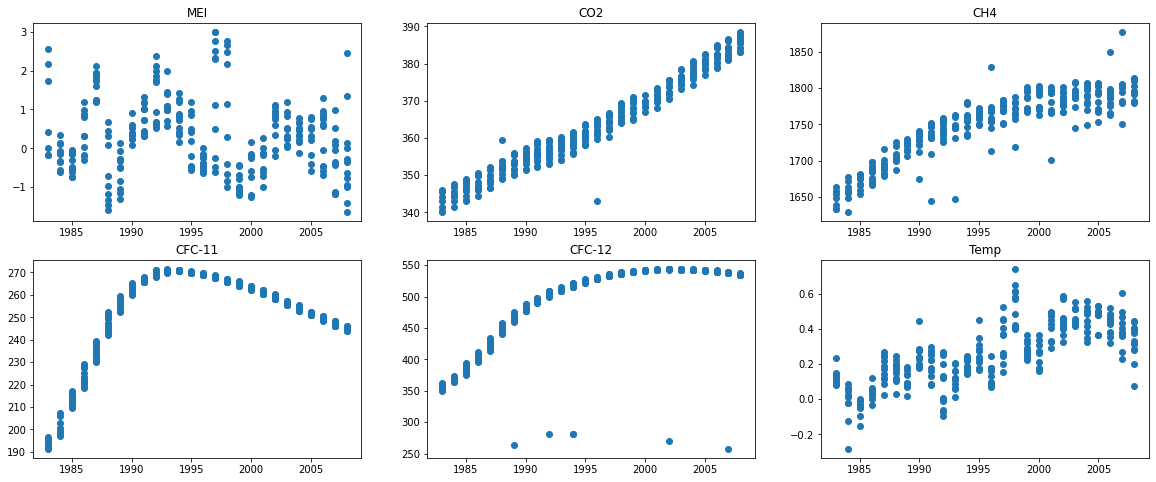

In [ ]:
# Create a figure with multiple subplots
fig, axs = plt.subplots(2, 3, figsize=(20, 8))

# Add scatter plots to each subplot. Each scatter plot has a variable that is plotted against the Year column.
axs[0, 0].scatter(df['Year'], df['MEI'])
axs[0, 0].set_title('MEI')
axs[0, 1].scatter(df['Year'], df['CO2'])
axs[0, 1].set_title('CO2')
axs[0, 2].scatter(df['Year'], df['CH4'])
axs[0, 2].set_title('CH4')
axs[1, 0].scatter(df['Year'], df['CFC-11'])
axs[1, 0].set_title('CFC-11')
axs[1, 1].scatter(df['Year'], df['CFC-12'])
axs[1, 1].set_title('CFC-12')
axs[1, 2].scatter(df['Year'], df['Temp'])
axs[1, 2].set_title('Temp')

<Figure size 576x360 with 0 Axes>

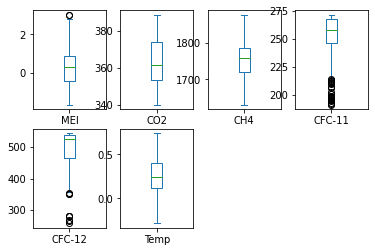

In [ ]:
plt.figure(figsize=(8,5))
# plots box plots for each variable 
numerical = df[["MEI", "CO2", "CH4", "CFC-11", "CFC-12", 'Temp']]
numerical.plot(kind='box', subplots = True, layout=(2, 4))
plt.show()

### Assumptions
Our team decided to determine outliers by crossreferencing the interquartile range method against visually observing outliers from scatter plots. Thus, we only consider removing data points if they are identified as outliers by both methods. We may not remove data points due to the nature of the data points, where it may be unpredictable.

#### For MEI
we do not consider outliers since there are no obvious outliers in the scatter plot

#### For CH4
we do not consider outliers as the interquartile range method does not identify any outliers

#### For CFC-11
we do not consider outliers as there are no obvious outliers in the scatter plot

#### For CFC-12
**we drop outliers since both methods identify the outliers clearly and the nature of the variable is not unpredictable**

#### For CO2
although there are 2 outliers shown in the scatter plot, we choose not to drop them since they are not identified by the interquartile range method

#### For Temp
since both methods do not identify any outliers, no values need to be dropped

<i><b>CFC-12</b></i>

In [ ]:
# function to calculate the IQR and returns the outliers
def get_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    return outliers

In [ ]:
# get CFC-12 outliers 
get_outliers(df, 'CFC-12')

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,L,191.324,350.113,M,H,0.109
1,1983,6,2.167,345.52,1633.71,L,192.057,351.848,M,H,0.118
2,1983,7,1.741,344.15,1633.22,L,192.818,353.725,M,H,0.137
73,1989,6,-0.273,355.30,1713.80,L,253.793,263.793,M,M,0.094
114,1992,11,0.602,354.27,1755.29,L,270.886,280.886,M,H,-0.097
132,1994,5,0.521,361.68,1755.04,L,270.691,280.691,M,H,0.218
133,1994,6,0.734,360.80,1746.61,L,270.516,280.516,M,M,0.191
227,2002,4,0.339,375.00,1782.47,L,259.574,269.574,H,L,0.443
287,2007,4,-0.049,386.40,1750.95,L,247.574,257.574,L,M,0.466


In [ ]:
# function to calculate the IQR and removes the outliers from the dataframe
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    return df.drop(outliers.index.values.tolist())

In [ ]:
# remove CFC-12 outliers from dataframe
no_outliers_df = remove_outliers(df, 'CFC-12')

Text(0.5, 1.0, 'After CFC-12')

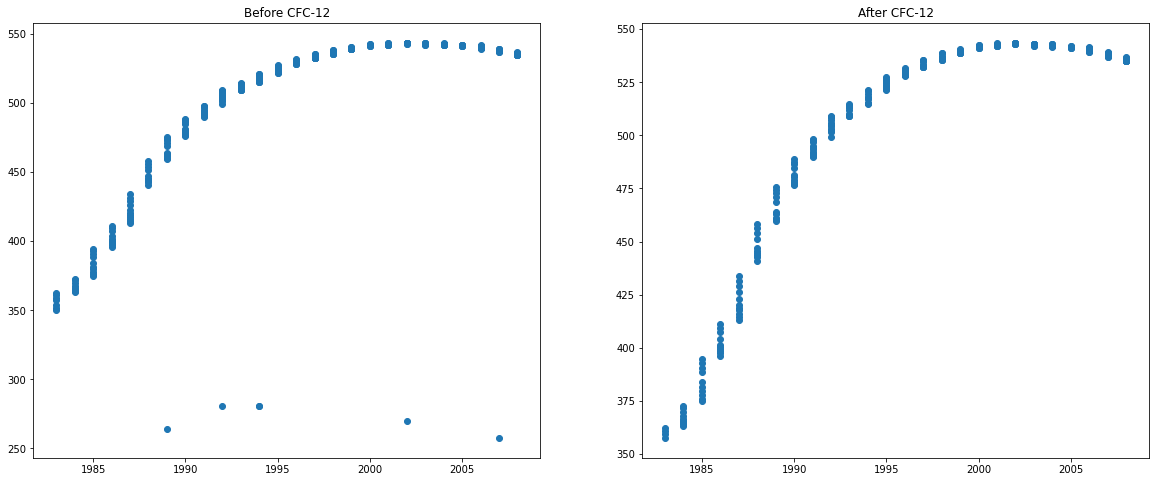

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Add scatter plots to each subplot. Each scatter plot has a variable that is plotted against the Year column.
axs[0].scatter(df['Year'], df['CFC-12'])
axs[0].set_title('Before CFC-12')
axs[1].scatter(no_outliers_df['Year'], no_outliers_df['CFC-12'])
axs[1].set_title('After CFC-12')

**c.** For categorical variables, perform the necessary encoding.

In [ ]:
# since N2O data can take two values H or L, we encode them and 1 or 0 respectively
N2O_mapper = {"H": 1, "L": 0}
# since TSI data can take three values H, M or L, we encode them and 2, 1 or 0 respectively
TSI_mapper = {"H": 2, "M": 1, "L": 0}
# since Aerosols data can take three values H, M or L, we encode them and 2, 1 or 0 respectively
Aerosols_mapper = {"H": 2, "M": 1, "L": 0}

# replaces letter value in column with corresponding numerical values defined in mapping for encoding
no_outliers_df['N2O_Encoded'] = no_outliers_df['N2O'].replace(N2O_mapper)
no_outliers_df['TSI_Encoded'] = no_outliers_df['TSI'].replace(TSI_mapper)
no_outliers_df['Aerosols_Encoded'] = no_outliers_df['Aerosols'].replace(Aerosols_mapper)

<i><b> Reasons for using Ordinal Encoding </b></i>

The categories for N2O, TSI and Aerosols are hierarchical, hence we used Ordinal Encoding to take note of the categories

### 3.	Exploratory analysis and visualization [50% of Part I]

**a.** For each variable, provide relevant summary statistics

<i><b>Year</b></i>

In [ ]:
# summary statistics for the column year
df_year = no_outliers_df['Year'].unique()
first_year = df_year[0]
last_year = df_year[len(df_year) - 1]
total_years = len(df_year)

print(f'There are {total_years} years of data starting from {first_year} to {last_year}')

There are 26 years of data starting from 1983 to 2008


<i><b>MEI, CO2, CH4, CFC-11, CFC-12, Temp</b></i>

In [ ]:
# summary statistics for numerical data
df_numerics = no_outliers_df[["MEI","CO2","CH4","CFC-11","CFC-12","Temp"]]
df_numerics.describe()

,MEI,CO2,CH4,CFC-11,CFC-12,Temp
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000
mean,0.286924,363.522824,1750.169084,252.908721,499.639863,0.256756
std,0.948393,12.634196,45.853097,18.989004,55.063573,0.176480
min,-1.635000,340.170000,1629.890000,194.392000,357.465000,-0.282000
25%,-0.417500,353.397500,1721.675000,246.473750,477.216250,0.126250
50%,0.241000,361.905000,1762.170000,258.499500,528.519000,0.248000
75%,0.878000,373.982500,1786.447500,267.309250,539.895250,0.405750
max,3.001000,388.500000,1877.610000,271.494000,543.647000,0.739000


<i><b>N2O, TSI, Aerosols</b></i>

In [ ]:
# summary statistics for categorical data
no_outliers_df.describe(include="object")

,N2O,TSI,Aerosols
count,262,262,262
unique,2,3,3
top,L,M,M
freq,254,134,127


**b.** For each variable, provide an appropriate visualisation depicting the distribution of its values, and summarize any key observation(s) you made.

**Response.** 

##### MEI Multivariate El Nino Southern Oscillation Index (MEI) and Year

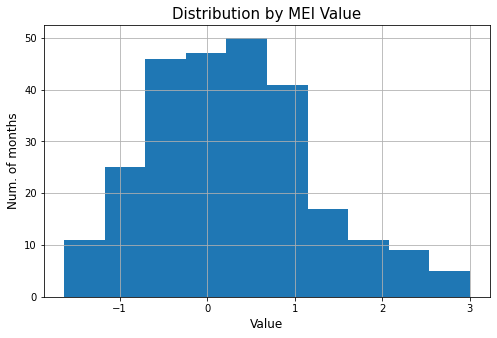

In [ ]:
# plot the histogram for MEI value distribution
plt.figure(figsize=(8,5))
plt.title("Distribution by MEI Value", fontsize=15)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Num. of months", fontsize=12)
no_outliers_df["MEI"].hist(bins=10)
plt.show()

The MEI value has a larger distribution towards the 0 value instead of having a uniform distribution. This means that even though the MEI values follow a trend of 3 to 7 years as according to our research, most of the time the effects of El Nino and La Nina are not too significant on the temperature of the ocean body.


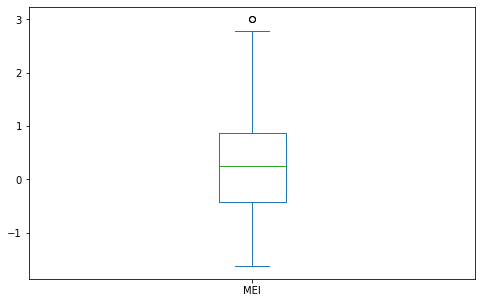

In [ ]:
#plot a box plot for MEI
plt.figure(figsize=(8,5))
numerical = no_outliers_df["MEI"]
numerical.plot(kind='box', layout=(2, 4))
plt.show()

The MEI value box plot shows that the data points are concentrated between -1 and 1 values, suggesting that effects of El Nino and La Nina are generally not strong. However, the data point outside the whiskers of the box plot suggests that the effects of El Nino or La Nina can still have significance on the temperature of the water body even though it is not a common occurence.

<function matplotlib.pyplot.show(close=None, block=None)>

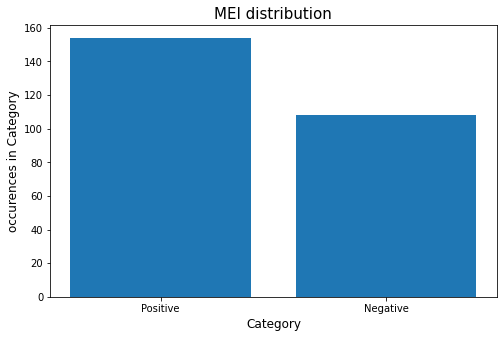

In [ ]:
#separate the data into positive and negative categories
categories_MEI = ['Negative', 'Positive']
bins_MEI = [-10, 0, 10]
no_outliers_df['MEI_category'] = pd.cut(no_outliers_df['MEI'], bins = bins_MEI, labels = categories_MEI)

#to determine x axis and y axis
data_MEI = no_outliers_df["MEI_category"].value_counts()
xs_MEI = data_MEI.index
ys_MEI = data_MEI

#bar chart to show the distribution between positive and negative MEI values
plt.figure(figsize = (8,5))
plt.bar(xs_MEI,ys_MEI)
plt.title("MEI distribution", fontsize=15)
plt.ylabel("occurences in Category", fontsize = 12)
plt.xlabel("Category", fontsize = 12)
plt.show

The MEI values have a distinction between the positive and negative values to represent the warming effects of El Nino and the cooling effects of La Nina respectively. The higher number of occurences of positive MEI values suggests that the effects of El Nino are generally more present and frequent as compared to the effects of La Nina. 

##### CO2 

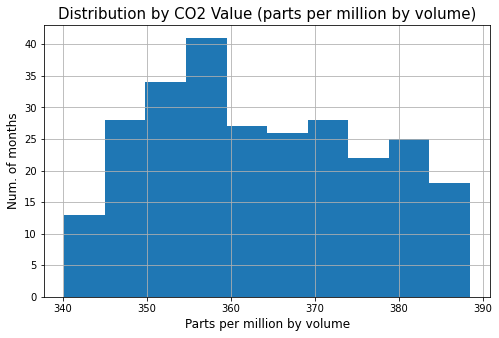

In [ ]:
# plot the histogram distribution
plt.figure(figsize=(8,5))
plt.title("Distribution by CO2 Value (parts per million by volume)", fontsize=15)
plt.xlabel("Parts per million by volume", fontsize=12)
plt.ylabel("Num. of months", fontsize=12)
no_outliers_df["CO2"].hist(bins=10)
plt.show()

The histogram shows that the values for CO2 is right skewed. It has a single peak at around 355 parts per million by volume atmospheric concentration. The right skew suggests that there are more values of CO2 having an atmospheric concentration above 355 parts per million by volume than below 355 parts per million by volume.

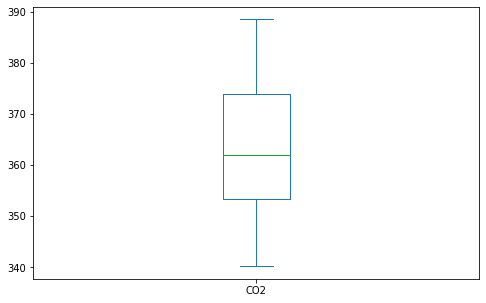

In [ ]:
# plot a box plot for CO2
plt.figure(figsize=(8,5))
numerical = no_outliers_df["CO2"]
numerical.plot(kind='box', layout=(2, 4))
plt.show()

The box plot for CO2 shows that CO2 has no outliers as there are no points beyond the whiskers.

##### CH4

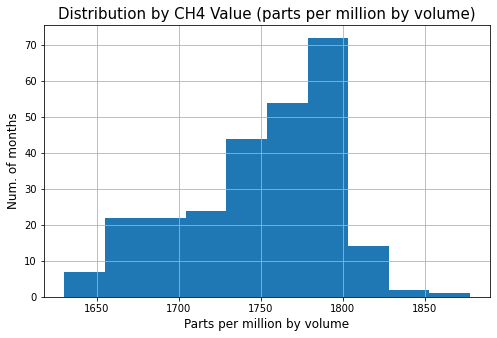

In [ ]:
# plot the histogram for CH4 value distribution
plt.figure(figsize=(8,5))
plt.title("Distribution by CH4 Value (parts per million by volume)", fontsize=15)
plt.xlabel("Parts per million by volume", fontsize=12)
plt.ylabel("Num. of months", fontsize=12)
no_outliers_df["CH4"].hist(bins=10)
plt.show()

The shape of the CH4 histogram is skewed to the left, with a single peak at around 1780-1790 parts per million by volume. The skew to the left indicates that there are more values lower than 1780-1790 parts per million by volume than values higher than 1780-1790 parts per million by volume.

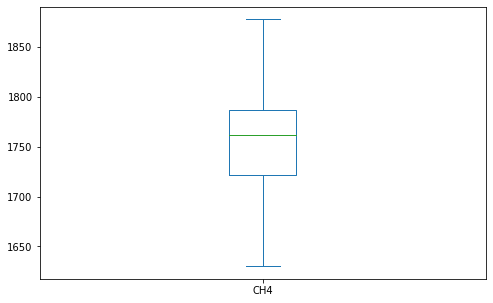

In [ ]:
# plot a box plot for CO2 values
plt.figure(figsize=(8,5))
numerical = no_outliers_df["CH4"]
numerical.plot(kind='box', layout=(2, 4))
plt.show()

In the CH4 box plot, there are no outliers, which are data points beyond the whiskers. The box is relatively narrow, indicating that the interquartile range of the data is small, and that the majority of CH4 values are within a relatively tight range.

##### N2O

<function matplotlib.pyplot.show(close=None, block=None)>

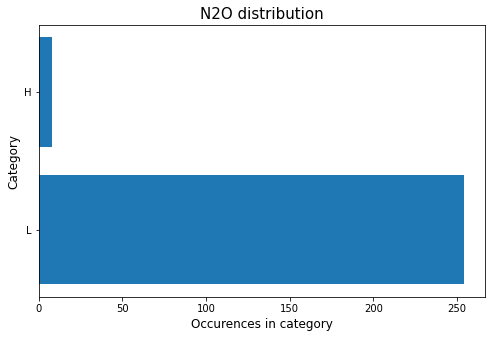

In [ ]:
# plot a bar chart to see the general distribution of N2O categories

data = no_outliers_df["N2O"].value_counts()

xs_N2O = data.index
ys_N2O = data

plt.figure(figsize = (8,5))
plt.barh(xs_N2O,ys_N2O)
plt.title("N2O distribution", fontsize=15)
plt.xlabel("Occurences in category", fontsize = 12)
plt.ylabel("Category", fontsize = 12)
plt.show

The graph shows a distribution of N2O to generally be in the low category. As information regarding how the categories low and high are determined is not described in the data dictionary, we are unable to determine if the data given is accurate in determining the low and high that led to such a difference in the number of high against the majority lows, or if it was due to the temperatures recorded really being this unbalanced.

##### CFC-11

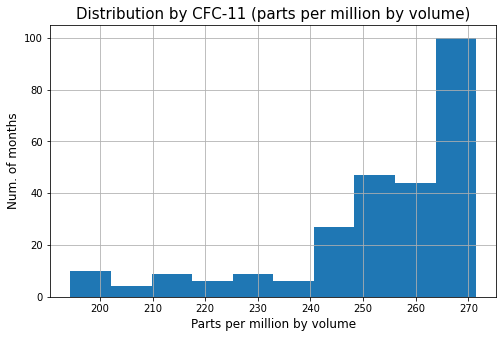

In [ ]:
# plot the histogram for CFC-11 distribution
plt.figure(figsize=(8,5))
plt.title("Distribution by CFC-11 (parts per million by volume)", fontsize=15)
plt.xlabel("Parts per million by volume", fontsize=12)
plt.ylabel("Num. of months", fontsize=12)
no_outliers_df["CFC-11"].hist(bins=10)
plt.show()

The distribution of CFC-11 values is left-skewed, with the mode at an atmospheric concentration of around 270 parts per million by volume with 100 occurrences. The left skew suggests that the majority of values lie above 240 parts per million by volume. Since there are significant occurences of the values outside the peak, it suggests that there could have been a sharp change in values over the year.

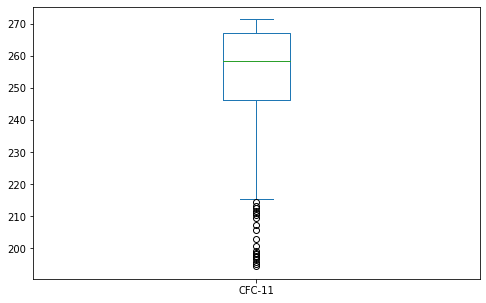

In [ ]:
# plot a box plot for CFC-11
plt.figure(figsize=(8,5))
numerical = no_outliers_df["CFC-11"]
numerical.plot(kind='box', layout=(2, 4))
plt.show()

There are many values that lie outside the whiskers of the box plot, which could suggest a large number of outliers. However, the histogram suggests that the CFC-11 data points below 210 parts per million by volume contribute to a significant amount of the data, which explains the points outside the whiskers as merely a sudden change in values.

##### CFC-12

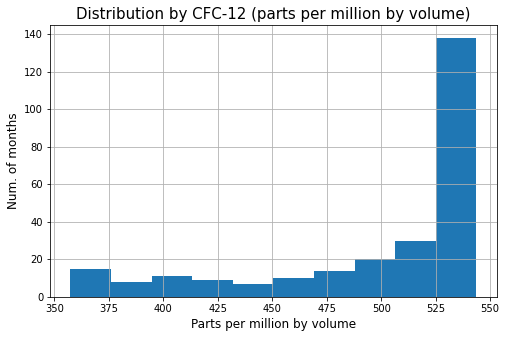

In [ ]:
# plot the histogram for the CFC-12 distribution
plt.figure(figsize=(8,5))
plt.title("Distribution by CFC-12 (parts per million by volume)", fontsize=15)
plt.xlabel("Parts per million by volume", fontsize=12)
plt.ylabel("Num. of months", fontsize=12)
no_outliers_df["CFC-12"].hist(bins=10)
plt.show()

The distribution of the occurences of CFC-12 is concentrated near 530 parts per million per volume but almost a 7 times smaller distribution of the other values that are below 530 parts per million by volume. This suggests that there is likely a steep change of the values over the years to cause the huge difference in distribution.

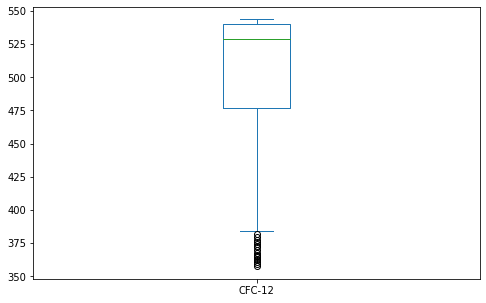

In [ ]:
# plot a box plot for CFC-12
plt.figure(figsize=(8,5))
numerical = no_outliers_df["CFC-12"]
numerical.plot(kind='box', layout=(2, 4))
plt.show()

The box plot suggests that there is a large number of values outside the whiskers of the box plot, which is below 400 parts per million by volume. However, due to the distribution of the CFC-12 values as determined in the histogram chart, it implies that there could have been a sudden change in values which resulted in the observation made.

##### TSI

<function matplotlib.pyplot.show(close=None, block=None)>

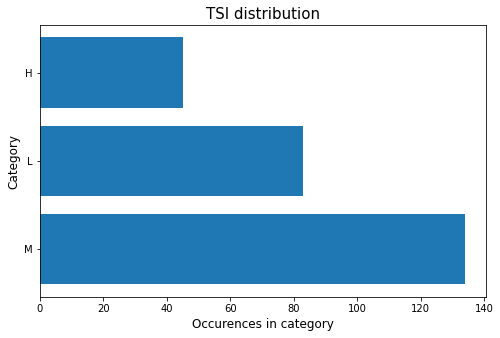

In [ ]:
# plot a bar chart to see the general distribution of TSI categories
data_TSI = no_outliers_df["TSI"].value_counts()

xs_TSI = data_TSI.index
ys_TSI = data_TSI

plt.figure(figsize = (8,5))
plt.barh(xs_TSI,ys_TSI)
plt.title("TSI distribution", fontsize=15)
plt.xlabel("Occurences in category", fontsize = 12)
plt.ylabel("Category", fontsize = 12)
plt.show

The graph shows a larger number of medium category TSI values compared to the low and high values which constitute a lower number of the months. This suggests that the average and hence most common sun energy emission level from the sun is generally at the medium range. Besides the most common category, the distribution of highs and lows are also relatively significant compared to the number of mediums which suggests that the solar radiation is generally fluctuating.

##### Aerosol

<function matplotlib.pyplot.show(close=None, block=None)>

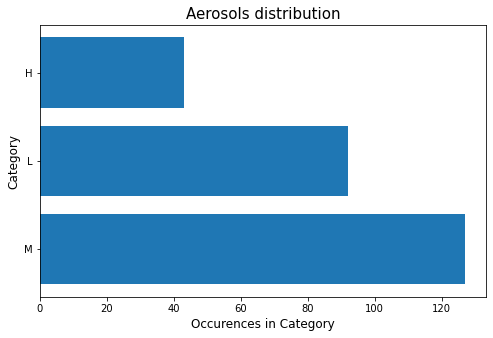

In [ ]:
# plot a bar chart to see the general distribution of Aerosols categories
data_Aerosols = no_outliers_df["Aerosols"].value_counts()

xs_Aerosols = data_Aerosols.index
ys_Aerosols = data_Aerosols

plt.figure(figsize = (8,5))
plt.barh(xs_Aerosols,ys_Aerosols)
plt.title("Aerosols distribution", fontsize=15)
plt.xlabel("Occurences in Category", fontsize = 12)
plt.ylabel("Category", fontsize = 12)
plt.show

The number of data points in the medium category is the highest and hence it can be concluded that the Aerosol distribution is likely to be medium category. However, the number of low category being comparable to the number of medium category also suggests that the number of Aerosols in the atmosphere is generally considered to be around low or medium. This could be explained by the number of significant volanic activities occuring which affects the amount of aerosols in the air, as well as other factors such as winds to determine how fast those particles are dispersed. 

**c.** Perform bi-variate analysis on the variables. You do not need to present the analysis of every pair of variables; only focus on the pairs you believe are worth investigating and explain. For each pair, describe the relationship between the two variables. Use appropriate statistical methods and/or visualizations.

**Response.** 

In [ ]:
# list the variables that can be used to 
# perform bi-variate analysis on
no_outliers_df.columns

Index(['Year', 'Month', 'MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI',
       'Aerosols', 'Temp', 'N2O_Encoded', 'TSI_Encoded', 'Aerosols_Encoded',
       'MEI_category'],
      dtype='object')

In [ ]:
corr_df = no_outliers_df[['MEI', 'CO2', 'CH4', 'N2O_Encoded', 'CFC-11', 'CFC-12', 'TSI_Encoded', 'Aerosols_Encoded', 'Temp']]

# computes the Pearson correlation coefficients between all pairs of variables
pear_corr = corr_df.corr(method='pearson')
# display result as heatmap plot
fig = px.imshow(pear_corr, text_auto=True, height=700)
fig.show()

##### MEI and Temp

In [ ]:
# create scatter plot
fig = px.scatter(no_outliers_df, x="MEI", y="Temp", color='Temp')
fig.show()

<i><b>Reason for choosing MEI and Temp</b></i>

The MEI Index, which measures the strength of the El Nino/La Nina-Southern Oscillation, is known to have a significant impact on global climate patterns and has been linked to changes in temperature.

In [ ]:
# computes the Pearson correlation coefficients between MEI and Temp
corr = np.corrcoef(no_outliers_df.MEI, no_outliers_df.Temp)
corr[0,1]

0.16071235829892844

<i><b>Relationship between the variables</b></i>



The 2 variables have a correlation coefficient of 0.135, which is close to 0. Therefore, the MEI does not have any significant effect on temperature.

##### CO2 and Temp

In [ ]:
# create scatter plot
fig = px.scatter(no_outliers_df, x="CO2", y="Temp", trendline="ols")
fig.show()

<i><b>Reason for choosing CO2 and Temp</b></i>



CO2 is a greenhouse gas that traps heat in the Earth's atmosphere which contributes to the warming of the planet.

In [ ]:
# computes the Pearson correlation coefficients between CO2 and Temp
corr = np.corrcoef(no_outliers_df.CO2, no_outliers_df.Temp)
corr[0,1]

0.742043113926328

<i><b>Relationship between the variables</b></i>

The high correlation coefficient of 0.745 indicates a strong and positive relationship between CO2 and temperature. As the concentration of CO2 increases, the temperature also increases.

##### CH4 and Temp

In [ ]:
# create scatter plot
fig = px.scatter(no_outliers_df, x="CH4", y="Temp", color='Temp', trendline='ols')
fig.show()

<i><b>Reason for choosing CH4 and Temp</b></i>

CH4 is a greenhouse gas that traps heat in the Earth's atmosphere which contributes to the warming of the planet.

In [ ]:
# computes the Pearson correlation coefficients between CH4 and Temp
corr = np.corrcoef(no_outliers_df.CH4, no_outliers_df.Temp)
corr[1,0]

0.6807730524874527

<i><b>Relationship between the variables</b></i>

The high correlation coefficient of 0.670 indicates a strong and positive relationship between CH4 and temperature. As the concentration of CH4 increases, the temperature also increases.

#####Temp and Year, categorised by N2O

In [ ]:
# create scatter plot
fig = px.scatter(no_outliers_df, x="Year", y="Temp", color='N2O')
fig.show()

<i><b>Reason for choosing N2O and Temp<i><b>

Nitrous oxide enhances the greenhouse effect just as carbon dioxide does by capturing reradiated infrared radiation from the Earth's surface and subsequently warming the troposphere.

Since there is only 8 data points that fall under an N2O level of "H", it is not fair to compare N2O against Temp to derive any correlation.

CFC-11 and Temp

In [ ]:
# create scatter plot
fig = px.scatter(no_outliers_df, x="CFC-11", y="Temp", color='Temp')
fig.show()

<i><b>Reason for choosing CFC-11 and Temp<i><b>

When CFC-11 reaches the stratosphere, it breaks down and releases its chlorine atoms to catalytically destroy ozone which worsens global warming. 

In [ ]:
xs = no_outliers_df["CFC-11"]
ys = no_outliers_df.Temp
# computes the Pearson correlation coefficients between CFC-11 and Temp
corr = np.corrcoef(xs, ys)
corr[1,0]

0.3673697663450421

<i><b>Relationship between the variables</b></i>

The low correlation coefficient of 0.380 indicates a weak, positive relationship between CFC-11 and temperature. As the concentration of CFC-11 increases, the temperature also increases but the increase in temperature is also affected by other variables.

#####CFC-12 and Temp

In [ ]:
# create scatter plot
fig = px.scatter(no_outliers_df, x="CFC-12", y="Temp", color='Temp')
fig.show()

<i><b>Reason for choosing CFC-12 and Temp<i><b>

CFC-12 absorbs light in a part of the infrared spectrum that more abundant greenhouse gases like CO2 and water vapor do not. By capturing that heat that would otherwise escape into space, even a small amount of CFC molecules can have a significant impact on warming. By performing a bivariate analysis on these two variables, we can examine the strength and direction of their relationship, and better understand the extent to which CFC-12 is driving changes in global temperature.

In [ ]:
xs = no_outliers_df["CFC-12"]
ys = no_outliers_df.Temp
# computes the Pearson correlation coefficients between CFC-11 and Temp
corr = np.corrcoef(xs, ys)
corr[1,0]

0.6975005858833704

<i><b>Relationship between the variables</b></i>

The high correlation coefficient of 0.616 indicates a strong, positive relationship between CFC-12 and temperature. As the concentration of CFC-12 increases, the temperature also increases.

#####TSI and Temp

In [ ]:
# create box plot
fig = px.box(no_outliers_df, x="TSI", y="Temp")
fig.update_traces(quartilemethod="exclusive")
fig.show()

<i><b>Reason for choosing TSI and Temp<i><b>

TSI, which is affected by the area of the sun that is radiating energy on to Earth, varies according to whether the sun spot is radiating more amounts of energy on Earth, which then increases global temperatures.


<i><b>Relationship between the variables<b><i>

Based on the boxplots, it can be seen that regardless whether TSI is low, medium or high, the temperatures do not vary much. This might be because the distance between the sun and earth is very great hence TSI is not very significant.

#####Aerosols and Temp

In [ ]:
# create box plot
fig = px.box(no_outliers_df, x="Aerosols", y="Temp", color="Aerosols")
fig.update_traces(quartilemethod="exclusive")
fig.show()

<i><b>Reason for choosing Aerosols and Temp<i><b>

Aerosols reflect the sun's energy back out into space which decreases the Earth's temperature.

<i><b>Relationship between the variables<b><i>

Based on the boxplots, it can be seen that the temperature is lower for for higher amounts of aerosols. Thus, aerosols and temperature have a negative relationship.

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

## Part II: Modeling [12% of final grade]

### 1. Problem formulation [15% of Part II]

**a.** Formulate one regression problem and one classification based on the dataset, in **no more than 50 words**.

**Response.** 

**b.** State which problem (regression or classification) you would be investigating and why, in **no more than 20 words**.

**Response.** 

**c.** Clearly specify the dependent variable you are predicting, and its significance, in **no more than 20 words**

**Response.** 

### 2. Model training [30% of Part II]

In [ ]:
data = pd.read_csv("climate.csv")

In [ ]:
n_rows, n_cols = data.shape
n_rows, n_cols

(308, 11)

In [ ]:
# Get a list of numerical, categorical features

datatypes = data.dtypes
print(datatypes)

categorical_features = datatypes[datatypes=="object"].index
numerical_features = datatypes[datatypes!="object"].index

Year          int64
Month         int64
MEI         float64
CO2         float64
CH4         float64
N2O          object
CFC-11      float64
CFC-12      float64
TSI          object
Aerosols     object
Temp        float64
dtype: object


In [ ]:
print(f"# categorical features: {len(categorical_features)}")
print(f"# numerical features: {len(numerical_features)}")

# categorical features: 3
# numerical features: 8


In [ ]:
# calculate percentage of non-NaN data

missing_percent = 1 - data.count() / n_rows


# filter for columns with non-zero count of NaN data

missing_percent[missing_percent > 0.0]
print(f"# features with missing data : {len(missing_percent[missing_percent>0.0])}")

# features with missing data : 2


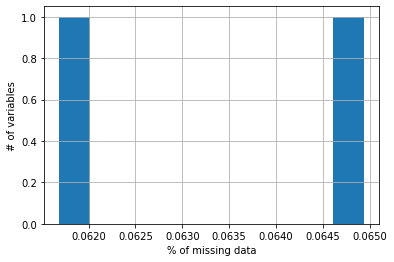

In [ ]:
missing_percent[missing_percent>0.].hist()
plt.xlabel("% of missing data")
plt.ylabel("# of variables")
plt.show()

In [ ]:
# get categorical variables with < 10% missing data and impute with mode

threshold = 0.10
cols_to_impute = missing_percent[(missing_percent<threshold)&(missing_percent>0.0)].index
cols_to_impute_mode = list(set(cols_to_impute) & set(categorical_features))
print(f"Categorical columns to impute with mode: {cols_to_impute_mode}\n")

for col in cols_to_impute_mode:
    data[col].fillna(data[col].mode().iloc[0], inplace=True)

# confirm no missing values

print(data[cols_to_impute_mode].count())

Categorical columns to impute with mode: ['TSI']

TSI    308
dtype: int64


In [ ]:
# get numerical variables with < 10% missing data and impute with mean

threshold = 0.10
cols_to_impute = missing_percent[(missing_percent<threshold)&(missing_percent>0.0)].index
cols_to_impute_mean = list(set(cols_to_impute) & set(numerical_features))
print(f"Numerical columns to impute with mean: {cols_to_impute_mean}\n")

for col in cols_to_impute_mean:
    data[col].fillna(data[col].mean(), inplace=True)

# confirm no missing data

print(data[cols_to_impute_mean].count())

Numerical columns to impute with mean: ['CO2']

CO2    308
dtype: int64


**a.** Perform feature selection. For each variable, decide if you want to include it as a feature and provide a justification. You may leverage on your analysis in Part I: EDA and/or perform additional analysis.

In [ ]:
datatypes = data.dtypes
categorical_features = datatypes[datatypes=="object"].index
numerical_features = datatypes[datatypes!="object"].index

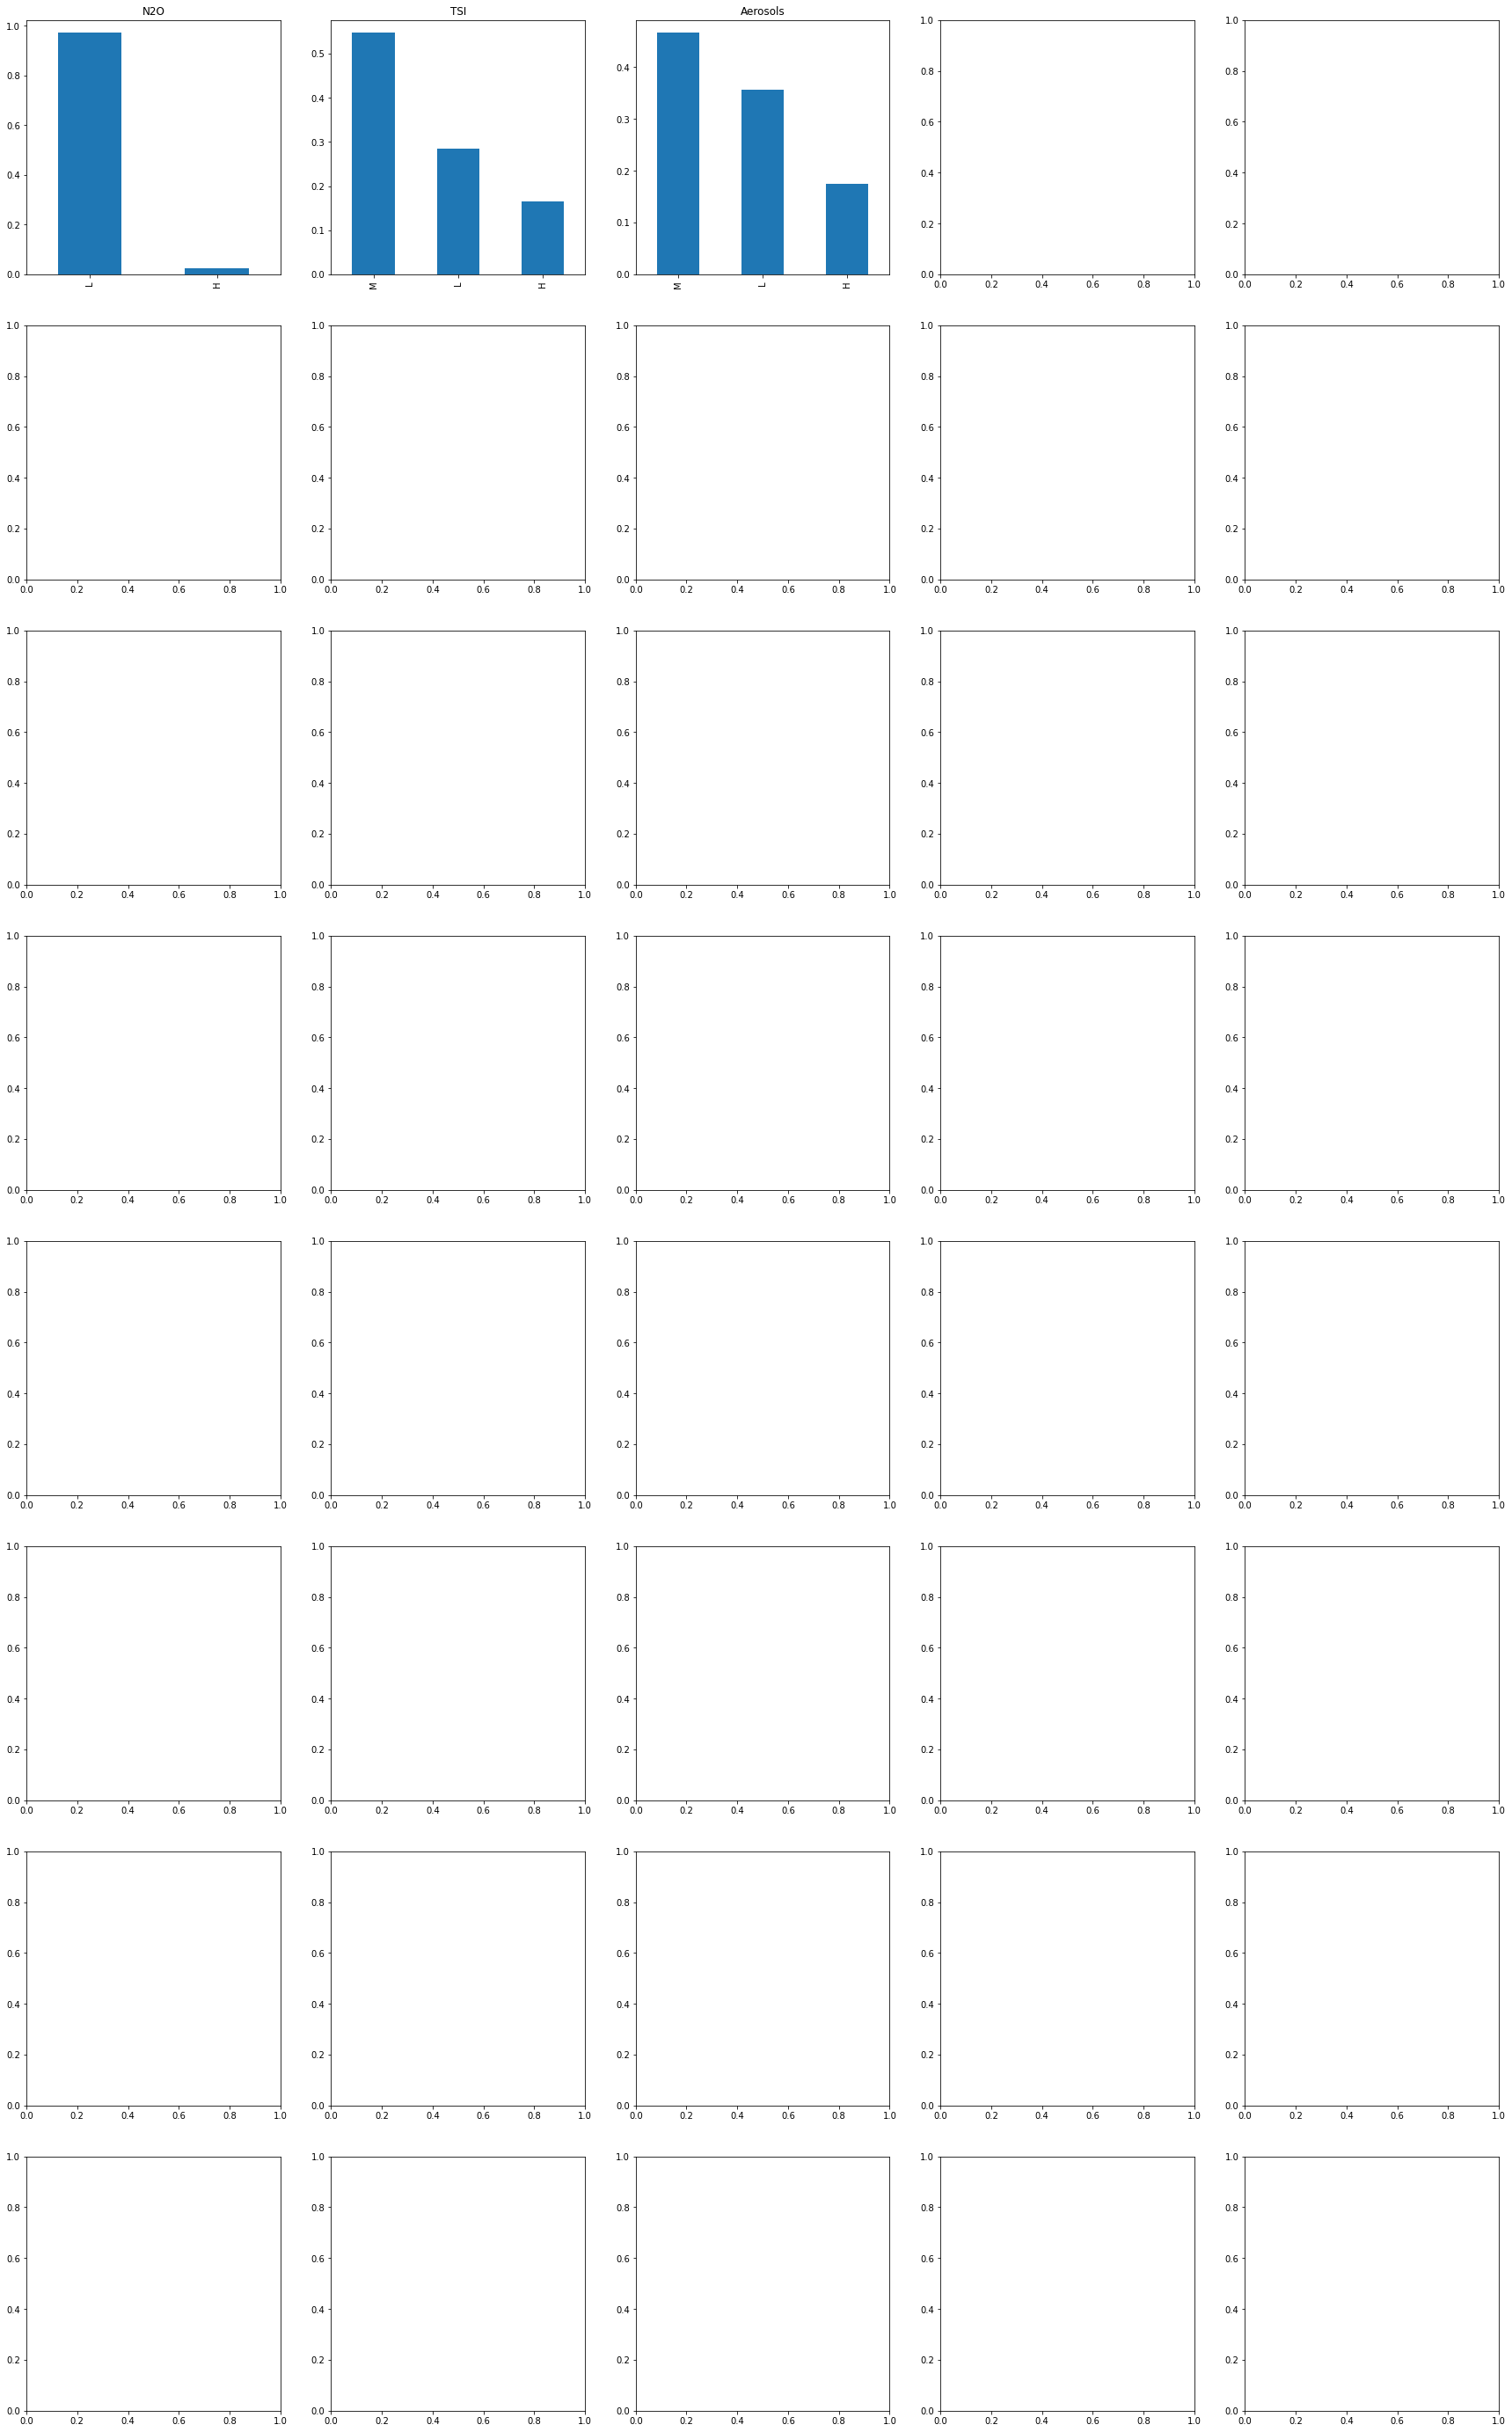

In [ ]:
n = len(categorical_features)

r, c = 8,5
fig, ax = plt.subplots(r, c, figsize=(30,50))

for i in range(n):
    feature = categorical_features[i]
    ax = plt.subplot(r,c,i+1)
    ax.set_title(feature)
    data[feature].value_counts(normalize=True).plot(kind='bar')

plt.show()

**Response.** 

**b.** Split the dataset into train and test sets. Describe how you split step by step.

**Response.** 

**c.** State the model(s) you will train, and explain your choice(s), in **no more than 50 words per model**. You only need to
train one model, but if you do train more models, limit yourself to no more than three---Grading is based on the validity and soundness of your model, rather than the quantity.

**Response.** 

**d.** For each model, perform the training, and report the trained parameters and the training scores, if applicable. 

**Response.** 

### 3. Model evaluation and selection [30% of Part II]

**a.** For each model, predict the response variable on the test set.

**Response.** 

**b.** Describe the metric you use to evaluate your model(s). Report the test scores for each model.

**Response.** 

**c.** If you trained more than one model, identify the final model you would choose for the prediction task, and explain your choice, **in no more than 50 words**.

**Response.** 

### 4. Findings and conclusion [20% of Part II]

**a.** Interpret what your model is implying, and summarize any insight you have drawn from the project. Explain if it is consistent with intuition, and if not, provide a plausible justification. Limit your entire response to **50 words**.

**Response.** 

**b.** Share any lesson you have learned from the project, in **no more than 50 words**.

**Response.** 

### 5. Non-technical protocol [5% of Part II]

**a.** Describe the detailed contribution of each team member, including both the tangible (e.g., implementation, testing, writing) and intangible (e.g., generating ideas, planning, leadership) efforts.

**Response.** 

**b.** List any references and sources you have cited.

**Response.** 